In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
### Reflect an existing database into a new model
# Declare base
Base = automap_base()

# Use base class to reflect the database tables
Base.prepare(engine, reflect=True)


In [7]:
# We can view all of the classes that automap found
Base.classes.keys()


['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station


In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)


# Exploratory Climate Analysis

## Measurement Table

In [10]:
###
first_row = session.query(Measurement).first()
print(first_row.__dict__)
###

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x1213cb358>, 'prcp': 0.08, 'station': 'USC00519397', 'tobs': 65.0, 'date': '2010-01-01', 'id': 1}


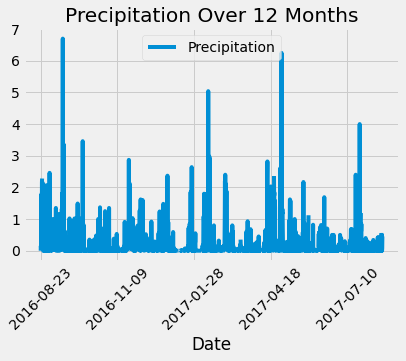

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database
all_rows = session.query(Measurement).all()
last_date = all_rows[-1].date
#print(f"Last date: {last_date}")

# Perform a query to retrieve the data and precipitation scores
last_year_rows = session.query(Measurement.prcp, Measurement.date).filter(Measurement.date >= '2016-08-23') \
                                                                .order_by(Measurement.date.asc()).all()
# for row in last_year_rows:
#     print(f"Precipitation: {row.prcp}, on: {row.date}")

# Save the query results as a Pandas DataFrame and set the index to the date column
measurement_df = pd.DataFrame(last_year_rows, columns=['Precipitation', 'Date'])
measurement_df.set_index('Date', inplace=True)

# Use Pandas Plotting with Matplotlib to plot the data
measurement_df.plot(title="Precipitation Over 12 Months", rot=45)
plt.show()


In [12]:
# Use Pandas to calcualte the summary statistics for the precipitation data
measurement_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


## Station Table

In [18]:
# Design a query to show how many stations are available in this dataset?
first_row_station = session.query(Station).first()
print(first_row_station.__dict__)

station_count = session.query(Station.id).count()
station_count

session_rows = session.query(Station).all()
for row in session_rows:
    print(row.id)
    print(row.name)


{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x10f3dbd68>, 'id': 1, 'elevation': 3.0, 'latitude': 21.2716, 'station': 'USC00519397', 'longitude': -157.8168, 'name': 'WAIKIKI 717.2, HI US'}
1
WAIKIKI 717.2, HI US
2
KANEOHE 838.1, HI US
3
KUALOA RANCH HEADQUARTERS 886.9, HI US
4
PEARL CITY, HI US
5
UPPER WAHIAWA 874.3, HI US
6
WAIMANALO EXPERIMENTAL FARM, HI US
7
WAIHEE 837.5, HI US
8
HONOLULU OBSERVATORY 702.2, HI US
9
MANOA LYON ARBO 785.2, HI US


In [29]:
# Verify station count by querying the Measurement table
station_count2 = session.query(func.count(Measurement.station.distinct()))
for s in station_count2:
    (count,) = s
    print(f"There are {count} stations.")



There are 9 stations.


In [38]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
station_row_counts = session.query(Measurement.station, func.count(Measurement.station)) \
                        .group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

for row in station_row_counts:
    print(f"Station {row[0]} has {row[1]} observations.")


Station USC00519281 has 2772 observations.
Station USC00519397 has 2724 observations.
Station USC00513117 has 2709 observations.
Station USC00519523 has 2669 observations.
Station USC00516128 has 2612 observations.
Station USC00514830 has 2202 observations.
Station USC00511918 has 1979 observations.
Station USC00517948 has 1372 observations.
Station USC00518838 has 511 observations.


In [45]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
lowest_temp = session.query(func.min(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
highest_temp = session.query(func.max(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
avg_temp = session.query(func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()

[(lowest_temp,)] = lowest_temp
[(highest_temp,)] = highest_temp
[(avg_temp,)] = avg_temp

print(f"The lowest temp for USC00519281: {lowest_temp}")
print(f"The highest temp for USC00519281: {highest_temp}")
print(f"The average temp for USC00519281: {avg_temp}")


The lowest temp for USC00519281: 54.0
The highest temp for USC00519281: 85.0
The average temp for USC00519281: 71.66378066378067


In [46]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station
last_year_tobs_rows = session.query(Measurement.tobs, Measurement.date).filter(Measurement.date >= '2016-08-23') \
                            .order_by(Measurement.date.asc()).all()

for row in last_year_tobs_rows:
    print(f"Temperature: {row.tobs}, on: {row.date}")


Temperature: 81.0, on: 2016-08-23
Temperature: 76.0, on: 2016-08-23
Temperature: 80.0, on: 2016-08-23
Temperature: 80.0, on: 2016-08-23
Temperature: 80.0, on: 2016-08-23
Temperature: 77.0, on: 2016-08-23
Temperature: 74.0, on: 2016-08-23
Temperature: 79.0, on: 2016-08-24
Temperature: 76.0, on: 2016-08-24
Temperature: 80.0, on: 2016-08-24
Temperature: 78.0, on: 2016-08-24
Temperature: 79.0, on: 2016-08-24
Temperature: 77.0, on: 2016-08-24
Temperature: 74.0, on: 2016-08-24
Temperature: 80.0, on: 2016-08-25
Temperature: 77.0, on: 2016-08-25
Temperature: 81.0, on: 2016-08-25
Temperature: 81.0, on: 2016-08-25
Temperature: 80.0, on: 2016-08-25
Temperature: 80.0, on: 2016-08-25
Temperature: 77.0, on: 2016-08-25
Temperature: 79.0, on: 2016-08-26
Temperature: 78.0, on: 2016-08-26
Temperature: 81.0, on: 2016-08-26
Temperature: 81.0, on: 2016-08-26
Temperature: 84.0, on: 2016-08-26
Temperature: 80.0, on: 2016-08-26
Temperature: 77.0, on: 2016-08-27
Temperature: 73.0, on: 2016-08-27
Temperature: 8

In [49]:
# Put temp data into a dataframe
temperature_df = pd.DataFrame(last_year_tobs_rows, columns=['Temp', 'Date'])
temperature_df.head()


,Temp,Date
0,81.0,2016-08-23
1,76.0,2016-08-23
2,80.0,2016-08-23
3,80.0,2016-08-23
4,80.0,2016-08-23


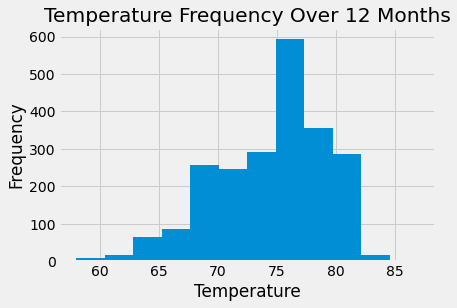

In [56]:
# Plot the results as a histogram
temperature_df.hist(column='Temp', bins=12)
plt.title("Temperature Frequency Over 12 Months")
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.show()


## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
